# Kernel Ridge Regression

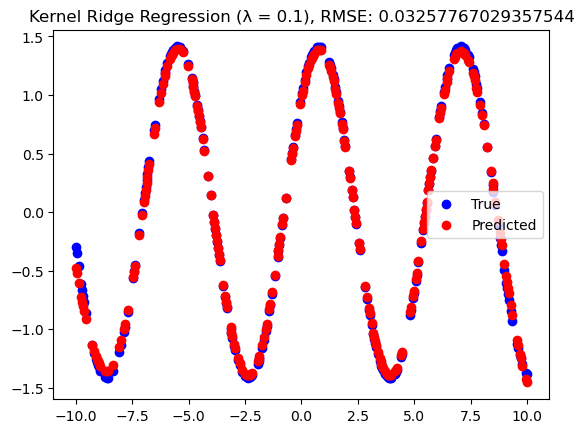

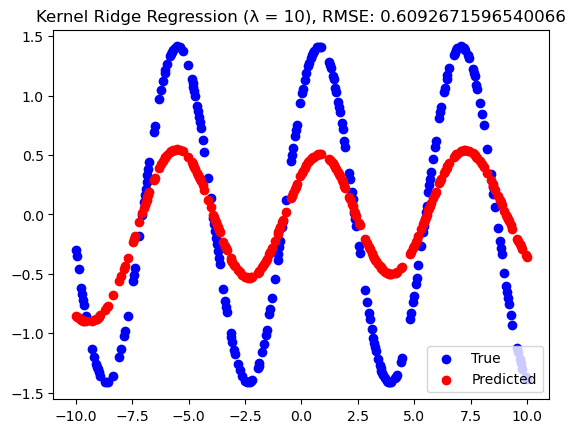

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load training and test data
x_train, y_train = np.loadtxt("ridgetrain.txt", unpack=True)
x_test, y_test = np.loadtxt("ridgetest.txt", unpack=True)

# Define Radial Basis Function (RBF) kernel
def rbf_kernel(x, y):
    return np.exp(-0.1 * np.square(x.reshape((-1, 1)) - y.reshape((1, -1))))

# Compute kernel matrices
K = rbf_kernel(x_train, x_train)  # K = rbf(x_train, x_train)
K_test = rbf_kernel(x_train, x_test)  # K_test = rbf(x_train, x_test)

# Identity matrix for regularization
I = np.eye(x_train.shape[0])

# List of regularization parameters (lambda)
lamda = [0.1, 1, 10, 100]

# Loop over different values of lambda
for l in lamda:
    # Compute alpha using kernelized Ridge Regression formula
    alpha = np.dot(np.linalg.inv(K + l * I), y_train.reshape((-1, 1)))

    # Make predictions on the test set
    y_pred = (np.dot(alpha.T, K_test)).reshape((-1, 1))

    # Compute Root Mean Squared Error (RMSE) between true and predicted values
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Plot the results
    plt.figure()
    plt.scatter(x_test, y_test, color='blue', label='True')
    plt.scatter(x_test, y_pred, color='red', label='Predicted')
    plt.title(f"Kernel Ridge Regression (λ = {l}), RMSE: {rmse}")
    plt.legend()
    plt.show()


# Landmark Ridge Regression

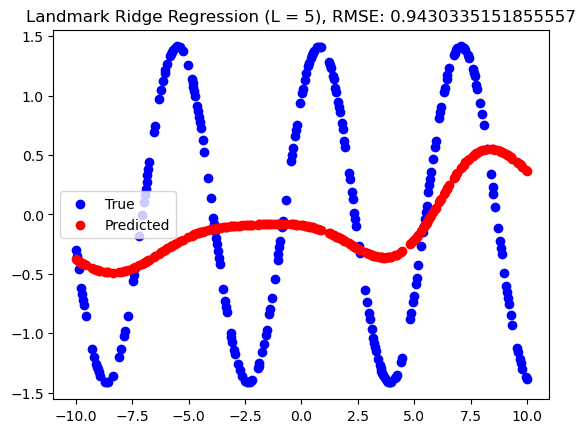

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load training and test data
x_train, y_train = np.loadtxt("ridgetrain.txt", unpack=True)
x_test, y_test = np.loadtxt("ridgetest.txt", unpack=True)

# Define Radial Basis Function (RBF) kernel
def rbf_kernel(x, y):
    return np.exp(-0.1 * np.square(x.reshape((-1, 1)) - y.reshape((1, -1))))

# List of numbers of landmarks to consider
num_of_lm = [2, 5, 20, 50, 100]

# Loop over different numbers of landmarks
for num in num_of_lm:
    # Randomly select 'num' landmarks from the training data
    z = np.random.choice(x_train, num, replace=False)

    # Compute the RBF kernel matrix for training data and landmarks
    phitrain = rbf_kernel(x_train, z)

    # Regularization term using identity matrix
    I = np.eye(num)

    # Compute the pseudo-inverse of the product of the kernel matrix and its transpose
    xtx = np.dot(phitrain.T, phitrain)
    xtx = xtx + 0.1 * I
    xtx = np.linalg.inv(xtx)
    xtx = np.dot(xtx, phitrain.T)

    # Compute the weight vector 'w'
    w = np.dot(xtx, y_train)

    # Compute the RBF kernel matrix for test data and landmarks
    phitest = rbf_kernel(x_test, z)

    # Make predictions on the test set
    y_pred = np.dot(phitest, w)

    # Compute Root Mean Squared Error (RMSE) between true and predicted values
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Plot the results and save the figure
    plt.figure()
    plt.scatter(x_test, y_test, color='blue', label='True')
    plt.scatter(x_test, y_pred, color='red', label='Predicted')
    plt.title(f"Landmark Ridge Regression (L = {num}), RMSE: {rmse}")
    plt.legend()
    plt.savefig(f'L{num}.png')
    plt.show()
    plt.close()
